## Prediction

In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rcParams['image.cmap'] = 'gist_earth'
np.random.seed(98765)
import tensorflow as tf

import sys
# Add the tf_unet folder path to the sys.path list
sys.path.append('/data3/floraxue/cs282a/SegmentNet/')

In [14]:
import numpy as np

def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [12]:
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util, image_util
from tf_unet.util import *

In [8]:
from skimage.io import imread, imsave, imshow
import glob
filelist_x = sorted(glob.glob('/data3/floraxue/cs282a/data/dataset_1/raw_crop_image_100/*.tif'))
filelist_y = sorted(glob.glob('/data3/floraxue/cs282a/data/dataset_1/label_grey_crop_100/B_phase/*.tif'))

In [25]:
i = 100
n =32
x_test = np.reshape(np.array([imread(fname) for fname in filelist_x[i*n:(i+1)*n]]),[n,256,256,1])
y_test = np.array([imread(fname) for fname in filelist_y[i*n:(i+1)*n]])

net = unet.Unet(channels=1, n_class=2, layers=4, features_root=16)# change feature_root to 32 for C_phase
prediction_batch = net.predict("/data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt", x_test)

2019-05-04 09:10:39,008 Layers 4, features 16, filter size 3x3, pool size: 2x2


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-04 09:10:40,402 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-04 09:10:40,468 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


In [28]:
path_images = "/data3/floraxue/cs282a/data/dataset_1/trainval/B_phase/"
generator = image_util.ImageDataProvider(path_images+"*.tif")
x_test, y_test = generator(32)
net = unet.Unet(channels=1, n_class=2, layers=4, features_root=16)# change feature_root to 32 for C_phase
prediction_batch = net.predict("/data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt", x_test)

Number of files used: 136900
Number of channels: 1
Number of classes: 2


2019-05-04 09:14:09,013 Layers 4, features 16, filter size 3x3, pool size: 2x2


INFO:tensorflow:Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


2019-05-04 09:14:10,479 Restoring parameters from /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt
2019-05-04 09:14:10,546 Model restored from file: /data3/floraxue/cs282a/SegmentNet/B_net/unet_B/model.ckpt


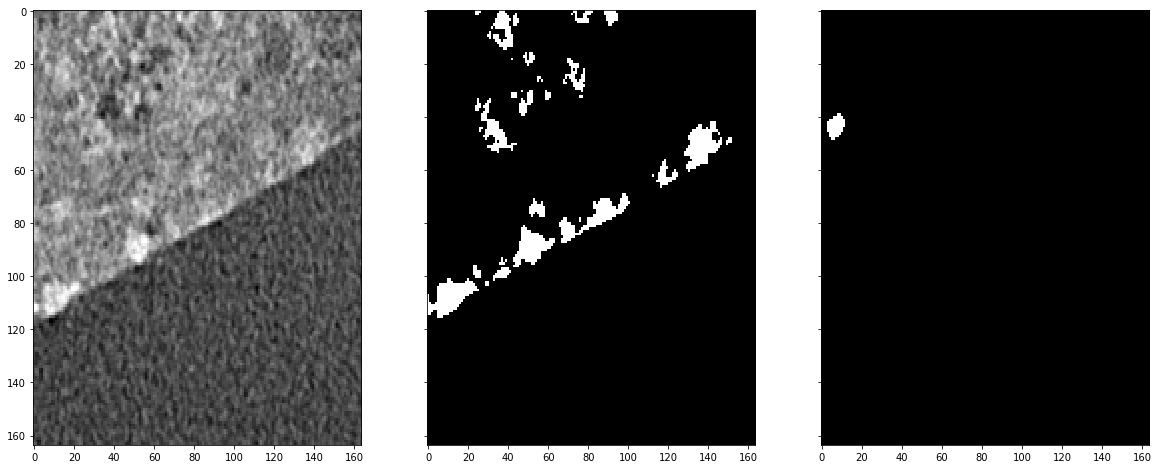

In [47]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(20,8))
ax[0].imshow(x_test[6,...,0],aspect="auto")
ax[1].imshow(y_test[6,...,1], aspect="auto")
mask = prediction_batch[6,:,:,1]>0.5 
ax[2].imshow(mask, aspect="auto")

In [ ]:
prediction_batch[2,...,1].shape

In [29]:
show_images(x_test[:,:,:,0], cols = 8)

In [31]:
show_images(y_test[:,:,:,1], cols = 8)

In [36]:
show_images(prediction_batch[:,:,:,1] , cols=8)